<a href="https://colab.research.google.com/github/b04201025/math.ai.hw/blob/master/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


# Load Module

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

from keras.models import Model, load_model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Lambda
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
from keras import metrics

# Define Function

In [0]:
# layer define
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(2,), mean=0., stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

#loss define
def vae_loss(x, x_recon):  
    recovery_loss = 784 * metrics.binary_crossentropy(x, x_recon)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return recovery_loss + kl_loss

def normalized(x):
    x -= x.min()
    x /= x.max()
    return x

# Load Data

In [0]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x / 255
test_x = test_x / 255
train_x = train_x.reshape((train_x.shape[0], -1))
test_x = test_x.reshape((test_x.shape[0], -1))

In [81]:
#model construct
#嘗試把encode和decode層加深
x = Input(shape=(784,))

#enc_0 = Dense(256, activation='relu')
enc_1 = Dense(128, activation='relu')
enc_2 = Dense(32, activation='sigmoid')

enc_mean = Dense(2)
enc_log_var = Dense(2)

enc_x = enc_2(enc_1(x))
z_mean = enc_mean(enc_x)
z_log_var = enc_log_var(enc_x)
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

dec_3 = Dense(32, activation='sigmoid')
dec_2 = Dense(128, activation='relu')
dec_1 = Dense(784, activation='sigmoid')

x_hat = dec_1(dec_2(dec_3(z)))

VAE = Model(x, x_hat)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 128)          100480      input_7[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 32)           4128        dense_16[0][0]                   
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 2)            66          dense_17[0][0]                   
__________________________________________________________________________________________________
dense_19 (

In [0]:
VAE.compile(loss=vae_loss, optimizer=Adam())

In [83]:
VAE.fit(x_train, x_train, batch_size=32, epochs=5) 

Epoch 1/5
60000/60000 [==============================] - 21s 358us/step - loss: 195.1141
Epoch 2/5
60000/60000 [==============================] - 21s 342us/step - loss: 175.2455
Epoch 3/5
60000/60000 [==============================] - 20s 336us/step - loss: 168.5596
Epoch 4/5
60000/60000 [==============================] - 20s 337us/step - loss: 163.8762
Epoch 5/5
60000/60000 [==============================] - 21s 348us/step - loss: 161.0882


In [84]:
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 latent 表示為 %s" %(idx, VAE_Encoder.predict(x_train[idx: idx+1])))

第 12898 圖的 latent 表示為 [[-1.0989208 -1.6092049]]


In [0]:
indices = np.random.randint(x_test.shape[0], size=1000)
VAE_latents = VAE_Encoder.predict(x_test[indices])

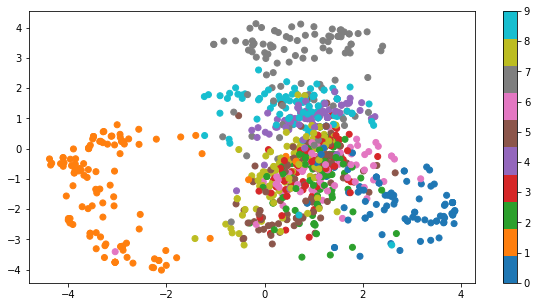

In [86]:
plt.figure(figsize=(10, 5))
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_test0[indices], cmap='tab10')#tab10 is Qualitative colormaps
plt.colorbar()

In [0]:
n = 15
digit_size = 28
grid_x_vae = np.linspace(-4+0.05, 4-0.05, n)
grid_y_vae = np.linspace(-4+0.05, 4-0.05, n)
VAE_figure = np.zeros((digit_size * n, digit_size * n))
for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        VAE_figure[(n-i-1) * digit_size: (n - i) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = normalized(digit)

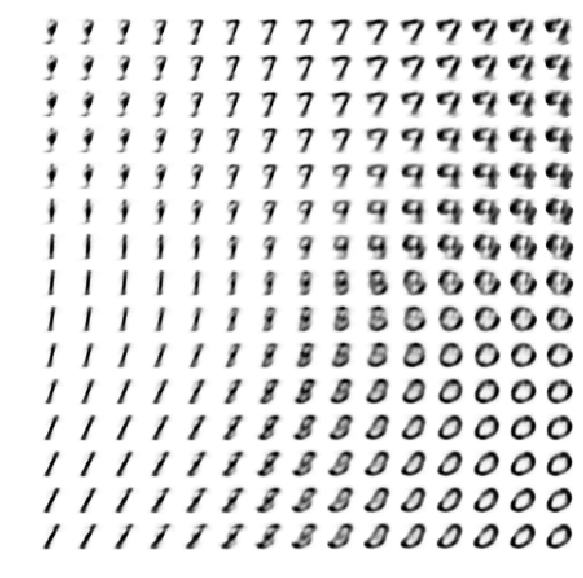

In [89]:
plt.figure(figsize=(10, 10))
plt.imshow(VAE_figure, cmap='Greys')
plt.axis('off')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


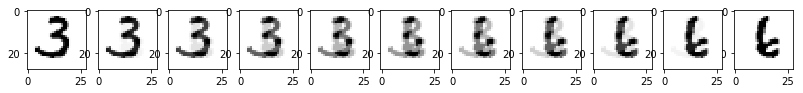

In [90]:
idx_1, idx_2 = np.random.randint(x_test.shape[0], size=2) # 自10000個Test手寫數字資料中隨機取出2個數字
data_0 = x_train0[idx_1]
data_1 = x_train0[idx_2]

plt.figure(figsize=(15, 15))
data_0 = x_train0[idx_1]
ax2 = plt.subplot(2, 3, 1)
ax2.imshow(data_0, cmap='Greys')

sx =1

for t in np.arange(0, 1, 0.1):
    data_t = (1-t)*x_train0[idx_1] + t*x_train0[idx_2]
    ax3 = plt.subplot(2, 12, sx )
    ax3.imshow(data_t, cmap='Greys')
    sx = sx+1
    ax4 = plt.subplot(2, 12, 11)
    ax4.imshow(data_1, cmap='Greys')

In [0]:
def inBetween(t):
    data_0 = x_train0[idx_1]
    data_1 = x_train0[idx_2]
    data_t = (1-t)*x_train0[idx_1] + t*x_train0[idx_2]

    mu_0 = VAE_Encoder.predict(x_train[idx_1:idx_1+1]).squeeze()
    mu_1 = VAE_Encoder.predict(x_train[idx_2:idx_2+1]).squeeze()
    mu_t = (1-t)*mu_0 + t*mu_1

    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 1, 2)
    ax1.scatter(mu_0[0], mu_0[1])
    ax1.scatter(mu_1[0], mu_1[1])
    ax1.scatter(mu_t[0], mu_t[1])

    ax2 = plt.subplot(2, 3, 1)
    ax2.imshow(data_0, cmap='Greys')

    ax3 = plt.subplot(2, 3, 2)
    ax3.imshow(data_t, cmap='Greys')

    ax4 = plt.subplot(2, 3, 3)
    ax4.imshow(data_1, cmap='Greys')

In [92]:
interact(inBetween, t=FloatSlider(value=0.5, 
                                  min=0, 
                                  max=1.0,
                                  step=0.02,))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.02), Output()), _dom_classes=('w…

<function __main__.inBetween>